In [261]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning


from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

from sklearn.manifold import TSNE

### Wrangle Data

In [262]:
# Load features and target datasets

df_features = pd.read_csv('train_features.csv', index_col=0)
df_targets = pd.read_csv('train_targets_scored.csv', index_col=0)

# Print the shapes
df_features.shape, df_targets.shape

((23814, 875), (23814, 206))

In [263]:
# Take a look at the df_features
df_features.head()

cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3     g-4  \
sig_id                                                                          
id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208 -0.1944   
id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604  1.0190   
id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764 -0.0323   
id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288  4.0620   
id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919  1.4180   

                 g-5     g-6  ...    c-90    c-91    c-92    c-93    c-94  \
sig_id                        ...                                           
id_000644bb2 -1.0120 -1.0220  ...  0.2862  0.2584  0.8076  0.5523 -0.1912   
id_000779bfc  0.5207  0.2341  ... -0.4265  0.7543  0.4708  0.0230  0.2957   
id_000a6266a  1.2390  0.1715  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240   
id_0015fd391 -0.8095 -1.9590  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632   
id_001626bd3 -0.8244 -0.2800  ...  0.0042  0.0048  0.6670  1.0690  0.5523   

                c-95    c-96    c-97    c-98    c-99  
sig_id                                                
id_000644bb2  0.6584 -0.3981  0.2139  0.3801  0.4176  
id_000779bfc  0.4899  0.1522  0.1241  0.6077  0.7371  
id_000a6266a -0.3174 -0.6417 -0.2187 -1.4080  0.6931  
id_0015fd391 -1.2880 -1.6210 -0.8784 -0.3876 -0.8154  
id_001626bd3 -0.3031  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 875 columns]

**Takeaways**
- Drop the categorical variables. (A common misake new data scientists make is to apply PCA to non-continous variables.)
- Scale the continuous variables by StandardScaler

In [264]:
# Drop the categoricals
df_features.drop(columns=['cp_type', 'cp_time', 'cp_dose'], inplace=True)
df_features.shape # 872 features left

(23814, 872)

In [265]:
# Scale the features so each feature has unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Print the data type of X_scaled
type(X_scaled) # the scaler returns a np.array

numpy.ndarray

In [266]:
# Length of the array should match the number of observations
len(X_scaled) # 23814, matched

23814

In [267]:
# The length of every member in the array shoulb math the number of the features
len(X_scaled[0]) # 872, matched

872

In [268]:
# Check the mean of the scaled dataset
X_scaled.mean(axis=0)[:5] # checked: the scaled data have a mean of ~0

array([-8.95115565e-18,  2.02892861e-17,  2.83453262e-17, -6.86255267e-18,
       -4.77394968e-18])

In [269]:
# Checkt the variance of the scaled dataset
X_scaled.var(axis=0)[:5] # Checked: should be 1 from begining to the end

array([1., 1., 1., 1., 1.])

### Principal Component Analysis
- **Linear dimensionality** reduction using **Singular Value Decomposition of the data** to project it to a lower dimensional space. 
- The **input data is centered but not scaled** for each features before applying the SVD. 
- Notice that this class **does NOT support sparse input.**

In [270]:
# Create a PCA object
pca = PCA(n_components=10)
pca

PCA(n_components=10)

In [271]:
# Transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Check the shape of X_pca
X_pca.shape

(23814, 10)

In [272]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_pca = pd.DataFrame(X_pca)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Concat the target columns
df_pca['nfkb'] = nfkb.values
df_pca['cyclo'] = cyclo.values

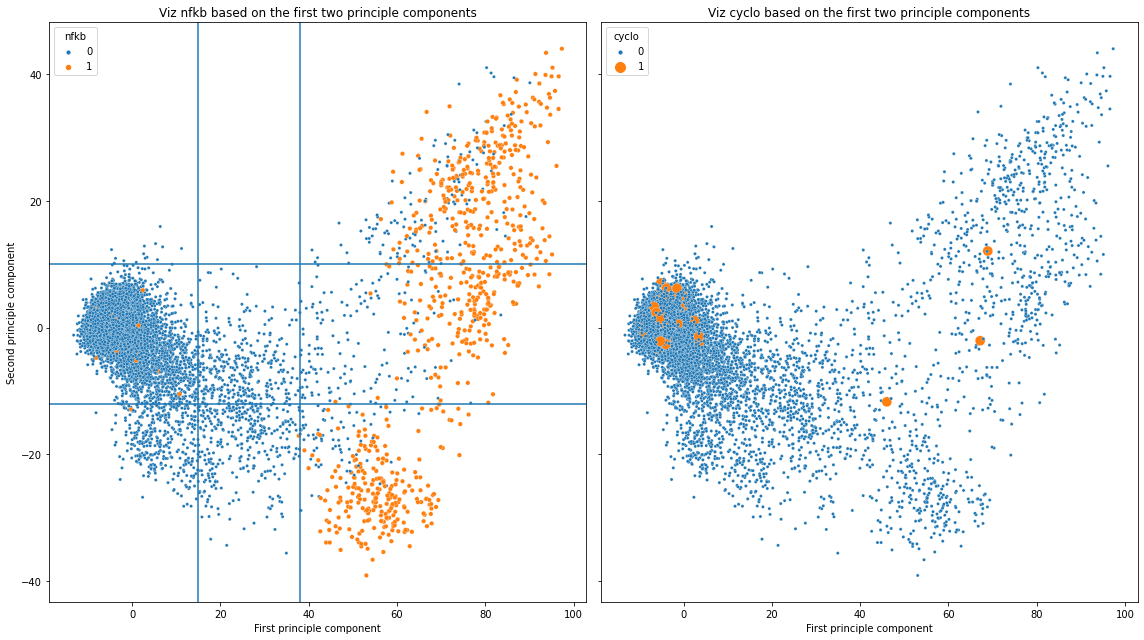

In [201]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_pca, x=df_pca[0], y=df_pca[1], 
                hue='nfkb', size='nfkb', sizes=(20, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.axvline(x=15)
ax1.axvline(x=38)
ax1.axhline(y=10)
ax1.axhline(y=-12)
ax1.set_ylabel('Second principle component')

sns.scatterplot(data=df_pca, x=df_pca[0], y=df_pca[1], hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')

plt.tight_layout()
plt.show()

**Takeaways**
- The first two principle components seperate the majority of positive nfkb inhibitors from the rest of the observations.
- There is a dense circular cluster, where most of the positive cyclooxygenase inhibitors are buried. 
- I groups the observations into 2 clusters and give them the following names:
    - dense **core**
    - scattered **satellites**
- **The ideal plot will be shatterring the dense core so the hidden positive cyclooxygenase inbihitors would be set apart from the background while the same time the satellies remain dispersed.** 

### Incremental PCA
- **Linear dimensionality** reduction using **Singular Value Decomposition of the data**.
- To keep only the most significant singular vectors to project the data to a lower dimentional space. 
- The input the data is centered but not scaled for each feature before applying the SVD. 

In [207]:
# Create the object
ipca = IncrementalPCA(n_components=10)
ipca

IncrementalPCA(n_components=10)

In [208]:
# Fit and transform the scaled data
X_ipca = ipca.fit_transform(X_scaled)

# Print the shape
X_ipca.shape

(23814, 10)

In [209]:
# Prepare the data for visualization

# Convert X_ipca to dataframe
df_ipca = pd.DataFrame(X_ipca)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_ipca['nfkb'] = nfkb.values
df_ipca['cyclo'] = cyclo.values

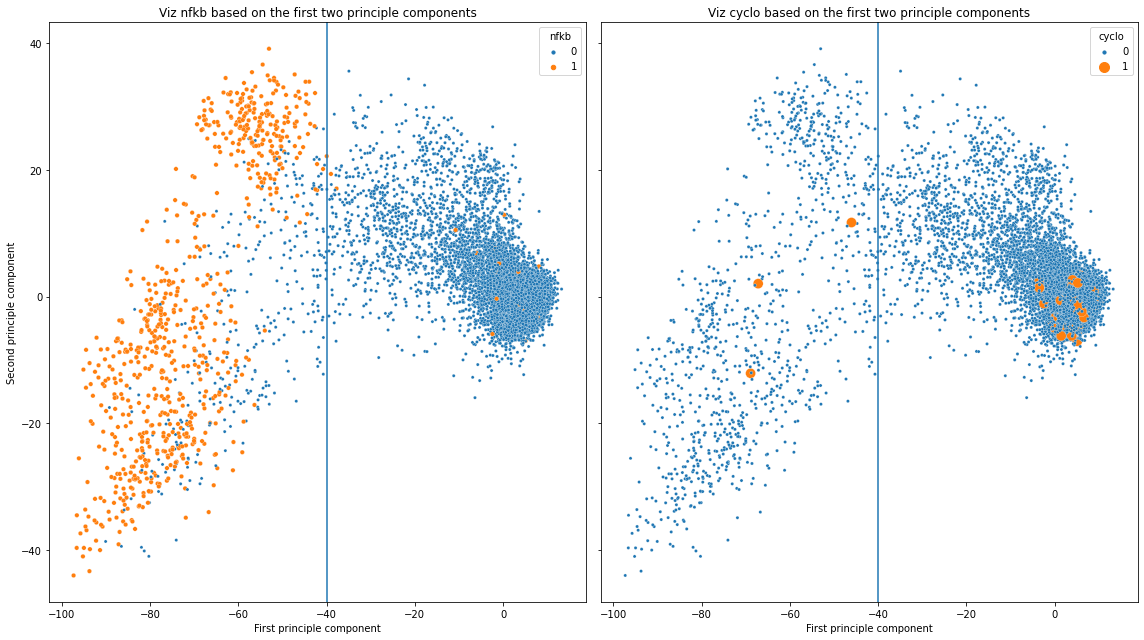

In [213]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_ipca, x=df_ipca[0], y=df_ipca[1], 
                hue='nfkb', size='nfkb', sizes=(20, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')
ax1.axvline(x=-40)

sns.scatterplot(data=df_ipca, x=df_ipca[0], y=df_ipca[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')
ax2.axvline(x=-40)

plt.tight_layout()
plt.show()

**Takeaways**
- Very aimilar to the plot by PCA

### Kernel PCA: RBF
- **Non-linear dimensionality reduction** through the use of kernels.

In [273]:
# Create the object
kpca = KernelPCA(n_components=2, kernel='rbf')

# Print the object
kpca

KernelPCA(kernel='rbf', n_components=2)

In [274]:
# Fit and transform the scaled data
X_kpca = kpca.fit_transform(X_scaled) # Took 2 mins

# Print the shape
X_kpca.shape

(23814, 2)

In [275]:
# Print attributes
kpca.lambdas_

array([1073.51645672,  400.7973264 ])

In [276]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_kpca = pd.DataFrame(X_kpca)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_kpca['nfkb'] = nfkb.values
df_kpca['cyclo'] = cyclo.values

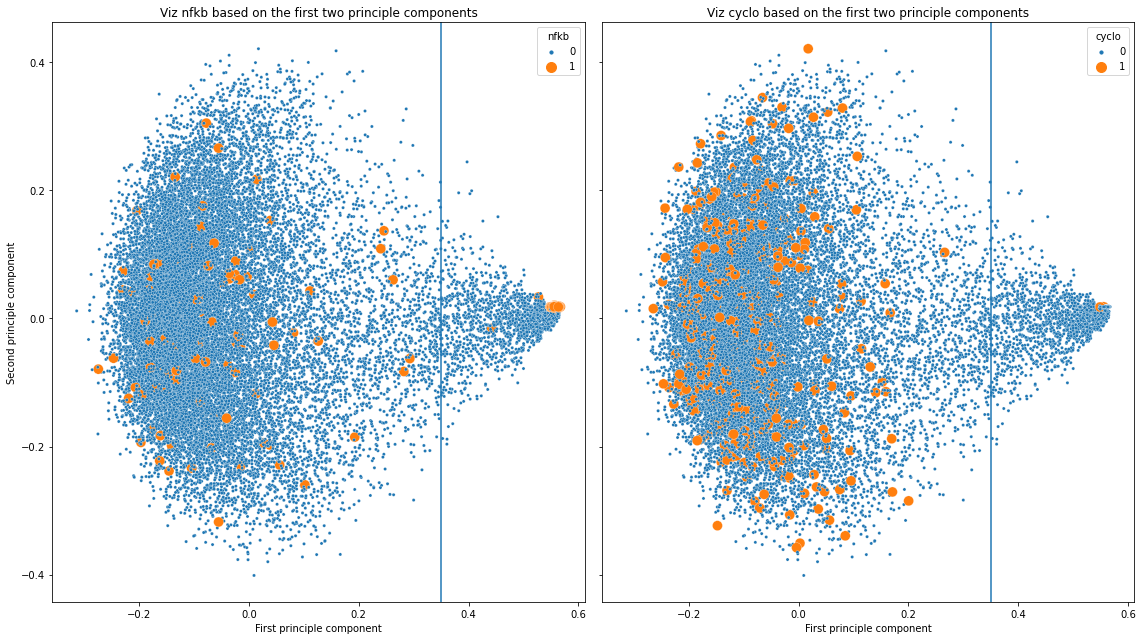

In [277]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_kpca, x=df_kpca[0], y=df_kpca[1], 
                hue='nfkb', size='nfkb', sizes=(100, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')
ax1.axvline(x=0.35)

sns.scatterplot(data=df_kpca, x=df_kpca[0], y=df_kpca[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')
ax2.axvline(x=0.35)

plt.tight_layout()
plt.show()

**Takeaways**:
- Changing the n_components from 10 to 5 greatly reduces the computational time by 20 mins. 
- Chaning the n_components from 5 to 2 reduces the time to 1 min.
- Changing n_components doesn't change the lambdas_.
- **It seems that RBF PCA scatters the dense core but aggregates the sattlites.** 
- **How does this will affect the modeling?** 
- I can split the dataset into two groups and model one by one. 

### Kernel PCA: poly

In [278]:
# Create the object
kpca_poly = KernelPCA(n_components=5, kernel='poly', degree=2)

# Print the object
kpca_poly

KernelPCA(degree=2, kernel='poly', n_components=5)

In [279]:
# Fit and transform the scaled data
X_kpca_poly = kpca_poly.fit_transform(X_scaled)

# Print the shape
X_kpca_poly.shape

(23814, 5)

In [280]:
# Print attributes
kpca_poly.lambdas_

array([48037.86148518,  8380.62719099,  5543.55386091,  3225.79581708,
        2525.74022531])

In [281]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_kpca_poly = pd.DataFrame(X_kpca_poly)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_kpca_poly['nfkb'] = nfkb.values
df_kpca_poly['cyclo'] = cyclo.values

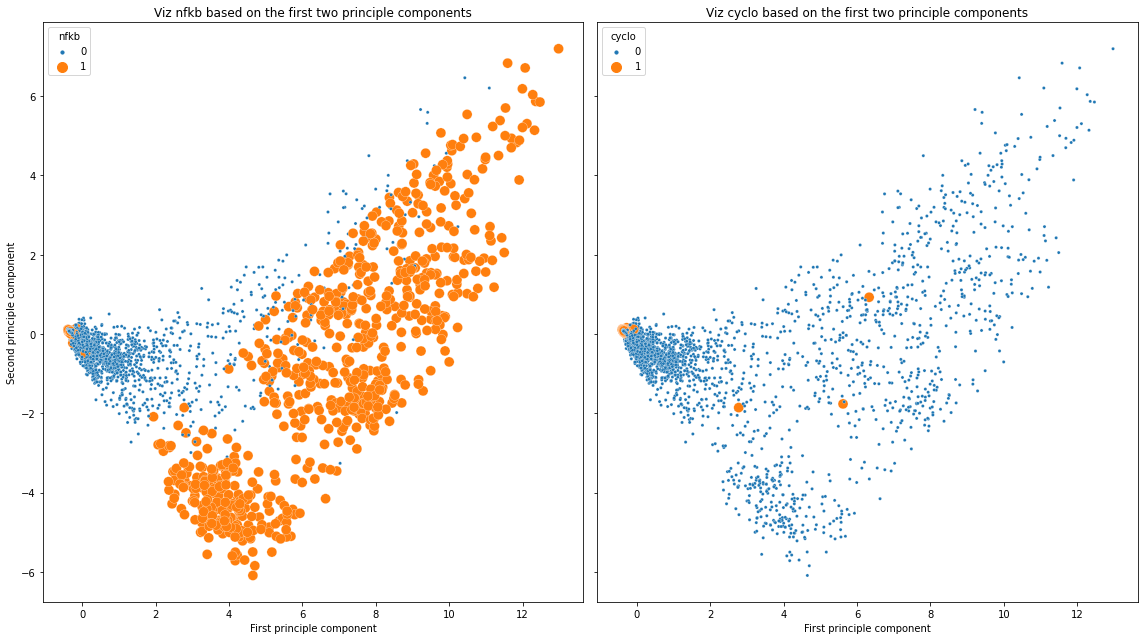

In [282]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_kpca_poly, x=df_kpca_poly[0], y=df_kpca_poly[1], 
                hue='nfkb', size='nfkb', sizes=(100, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')

sns.scatterplot(data=df_kpca_poly, x=df_kpca_poly[0], y=df_kpca_poly[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')

plt.tight_layout()
plt.show()

**Takeaways**
- The degree by default is 3: 
    - Poly PCA flatten the dataset to almost one dimention, like x-axis
- Chaning the degree to 5:
    - Still one dimention, but like y-axis
- Changing the kernel to 'linear':
    - As expected, same to PCA
- Changing the degree to 2: 
    - Make both core the stallites dense. 

### Kernel PCA: Sigmoid

In [283]:
# Create the object
kpca_sig = KernelPCA(n_components=5, kernel='sigmoid')

# Print the object
kpca_sig

KernelPCA(kernel='sigmoid', n_components=5)

In [284]:
# Fit and transform the scaled data
X_kpca_sig = kpca_sig.fit_transform(X_scaled)

# Print the shape
X_kpca_sig.shape

(23814, 5)

In [285]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_kpca_sig = pd.DataFrame(X_kpca_sig)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_kpca_sig['nfkb'] = nfkb.values
df_kpca_sig['cyclo'] = cyclo.values

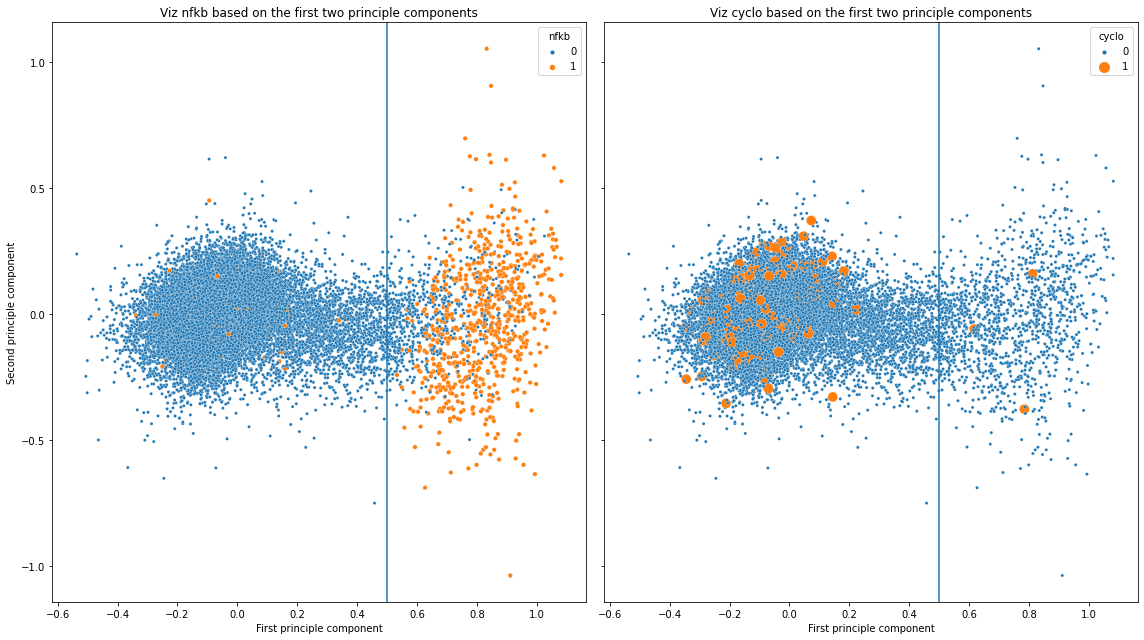

In [286]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_kpca_sig, x=df_kpca_sig[0], y=df_kpca_sig[1], 
                hue='nfkb', size='nfkb', sizes=(20, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')
ax1.axvline(x=0.5)

sns.scatterplot(data=df_kpca_sig, x=df_kpca_sig[0], y=df_kpca_sig[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')
ax2.axvline(x=0.5)

plt.tight_layout()
plt.show()

**Takeaways**
- The satellites become dense and the core become a little bit loose. 

### Kernel PCA: Cosine

In [287]:
# Create the object
kpca_cos = KernelPCA(n_components=5, kernel='cosine')

# Print the object
kpca_cos

KernelPCA(kernel='cosine', n_components=5)

In [288]:
# Fit and transform the scaled data
X_kpca_cos = kpca_cos.fit_transform(X_scaled)

# Print the shape
X_kpca_cos.shape

(23814, 5)

In [289]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_kpca_cos = pd.DataFrame(X_kpca_cos)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_kpca_cos['nfkb'] = nfkb.values
df_kpca_cos['cyclo'] = cyclo.values

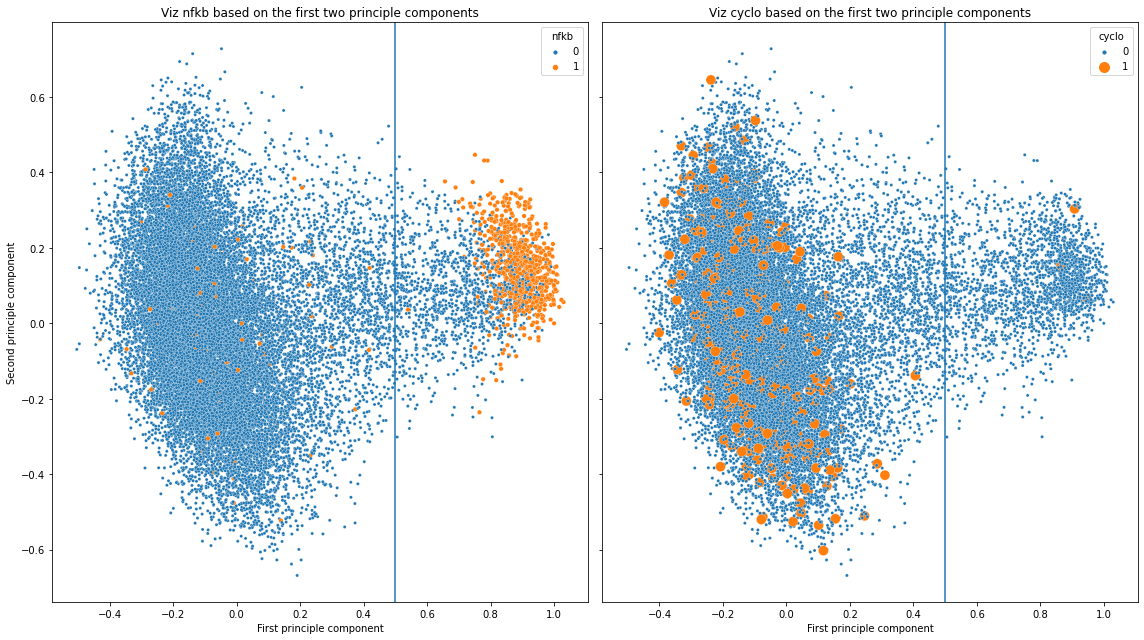

In [290]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_kpca_cos, x=df_kpca_cos[0], y=df_kpca_cos[1], 
                hue='nfkb', size='nfkb', sizes=(20, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')
ax1.axvline(x=0.5)

sns.scatterplot(data=df_kpca_cos, x=df_kpca_cos[0], y=df_kpca_cos[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')
ax2.axvline(x=0.5)

plt.tight_layout()
plt.show()

**Takeaways**
1. The left part of the plot is very similar to RBF PCA, which is the dense core. 
2. Teh right part of the plot is more disperse than RBF PCA, which is the satellites. 

### Sparse PCA
- A particular disavdantage of ordinary PCA is that the principal components are usually linear combination of all input variables.
- Sparse PCA overcomes this by finding linear combinations that contain just a new input variables.
- **alpha**: sparsity controlling parameter. Higher values lead to sparser components.

In [ ]:
# Create the object
spca = SparsePCA(n_components=5, alpha=1) 

# Print the object
spca

In [ ]:
# Fit and transform the scaled data
X_spca = spca.fit_transform(X_scaled) # Took 14 mins

# Print the shape
X_spca.shape

In [ ]:
# Print the attributes
print(spca.n_components_)

In [ ]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_spca = pd.DataFrame(X_spca)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_spca['nfkb'] = nfkb.values
df_spca['cyclo'] = cyclo.values

In [ ]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_spca, x=df_spca[0], y=df_spca[1], 
                hue='nfkb', size='nfkb', sizes=(20, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')

sns.scatterplot(data=df_spca, x=df_spca[0], y=df_spca[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')

plt.tight_layout()
plt.show()

**Takeaways**
- Same to regular PCA. The plot simply flipped 180 degrees. 
- I assumes that since the data is not sparse so this algorithm can't exert its influence.  

### Gaussian Random Projection (GRP)
- Reduce dimentionality through **Gaussian Random Project.**
- eps: parameter to control **the quality of the embedding.**
- Does random state affect the results? 
    - Don't affect the reletive position of the dots

In [222]:
# Create the object
grp = GaussianRandomProjection(n_components=10, random_state=123)

# Print the object
grp

GaussianRandomProjection(n_components=10, random_state=123)

In [223]:
# Fit and transform the scaled data
X_grp = grp.fit_transform(X_scaled)

# Print the shape
X_grp.shape

(23814, 10)

In [224]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_grp = pd.DataFrame(X_grp)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_grp['nfkb'] = nfkb.values
df_grp['cyclo'] = cyclo.values

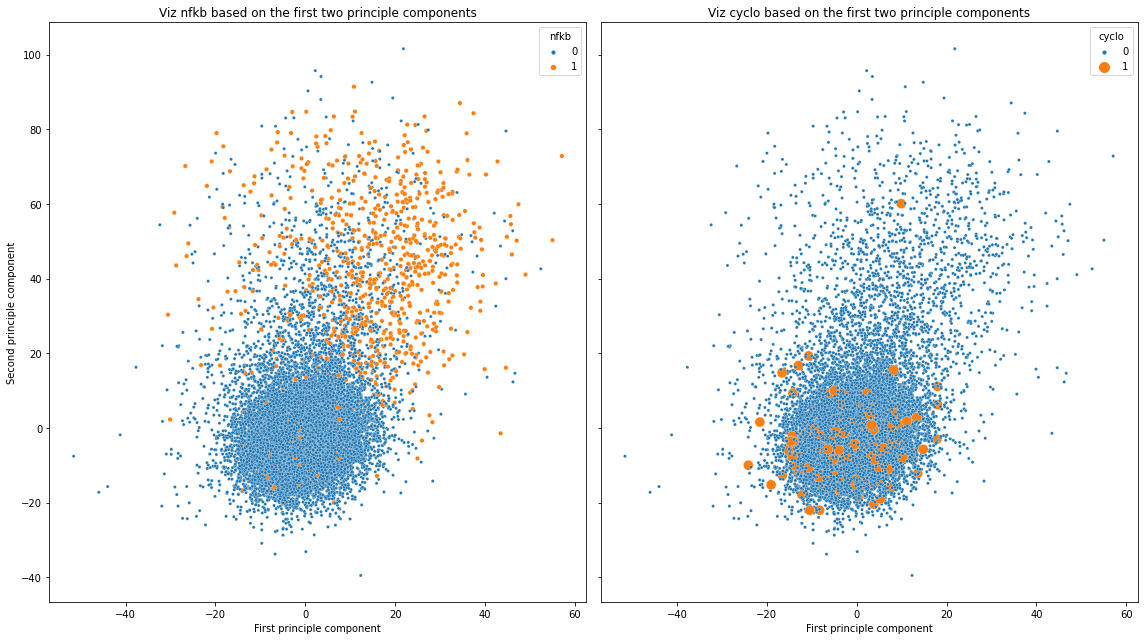

In [225]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_grp, x=df_grp[0], y=df_grp[1], 
                hue='nfkb', size='nfkb', sizes=(20, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')

sns.scatterplot(data=df_grp, x=df_grp[0], y=df_grp[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')

plt.tight_layout()
plt.show()

**Takeaways**
- Dense core still remain dense. However, satellites are coming together.

### Gaussian Random Projection (GRP) - Different Random State

In [226]:
# Create the object
grp = GaussianRandomProjection(n_components=10, random_state=567)

# Print the object
grp

GaussianRandomProjection(n_components=10, random_state=567)

In [227]:
# Fit and transform the scaled data
X_grp = grp.fit_transform(X_scaled)

# Print the shape
X_grp.shape

(23814, 10)

In [228]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_grp = pd.DataFrame(X_grp)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_grp['nfkb'] = nfkb.values
df_grp['cyclo'] = cyclo.values

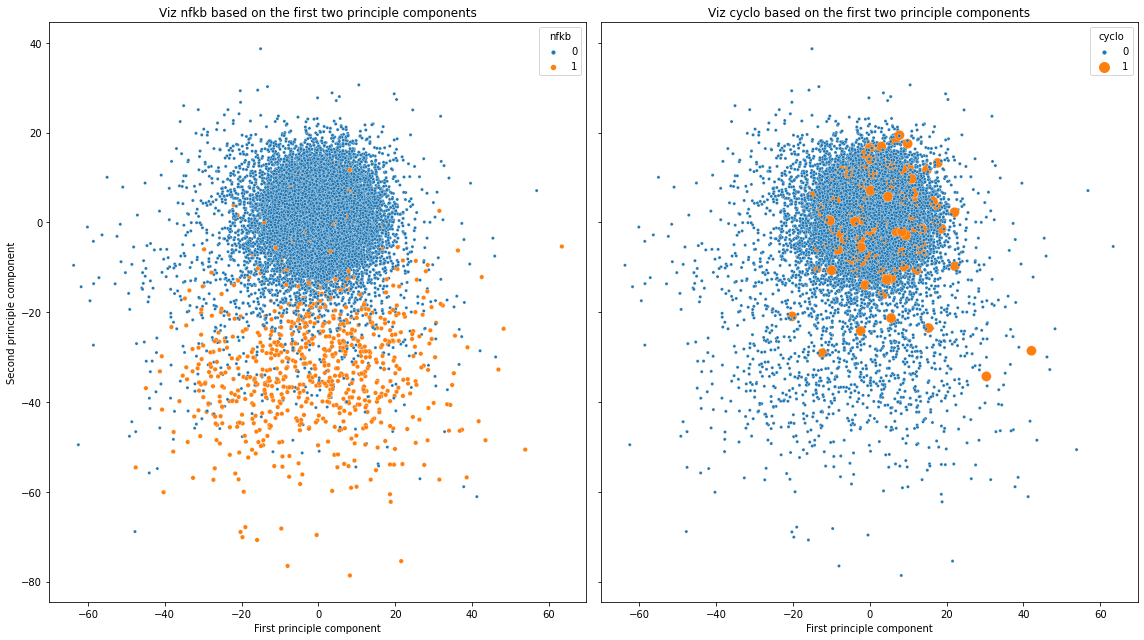

In [229]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_grp, x=df_grp[0], y=df_grp[1], 
                hue='nfkb', size='nfkb', sizes=(20, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')

sns.scatterplot(data=df_grp, x=df_grp[0], y=df_grp[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')

plt.tight_layout()
plt.show()

**Takeaways**
- Changing the random state simply rotate the plot 180 degress. 

### Sparse Random Projection (SRP)
- Reduce dimensionality through sparse random projection

In [230]:
# Create the object
srp = SparseRandomProjection(n_components = 10, random_state=123)

# Print the object
srp

SparseRandomProjection(n_components=10, random_state=123)

In [231]:
# Fit and transform the scaled data
X_srp = srp.fit_transform(X_scaled)

# Print the shape
X_srp.shape

(23814, 10)

In [232]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_srp = pd.DataFrame(X_srp)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_srp['nfkb'] = nfkb.values
df_srp['cyclo'] = cyclo.values

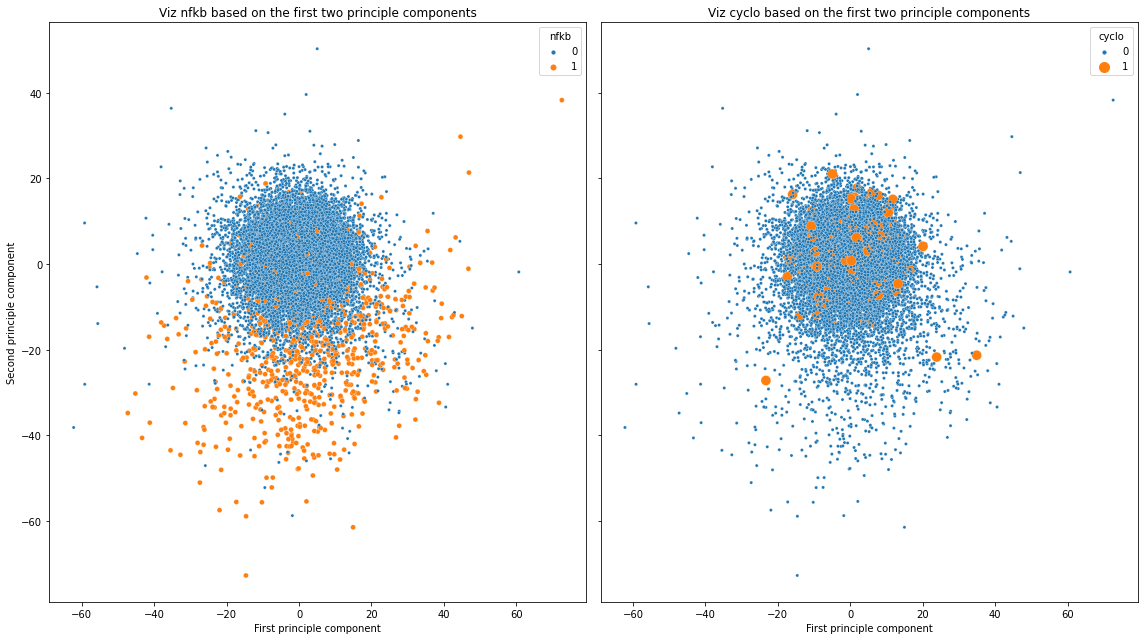

In [233]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_srp, x=df_srp[0], y=df_srp[1], 
                hue='nfkb', size='nfkb', sizes=(25, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')

sns.scatterplot(data=df_srp, x=df_srp[0], y=df_srp[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')

plt.tight_layout()
plt.show()

**Takeaways**:
- Similar to Guassian Random Projection. 

### Sparse Random Projection (SRP) - different random state
- Reduce dimensionality through sparse random projection

In [234]:
# Create the object
srp = SparseRandomProjection(n_components = 10, random_state=567)

# Print the object
srp

SparseRandomProjection(n_components=10, random_state=567)

In [235]:
# Fit and transform the scaled data
X_srp = srp.fit_transform(X_scaled)

# Print the shape
X_srp.shape

(23814, 10)

In [236]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_srp = pd.DataFrame(X_srp)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_srp['nfkb'] = nfkb.values
df_srp['cyclo'] = cyclo.values

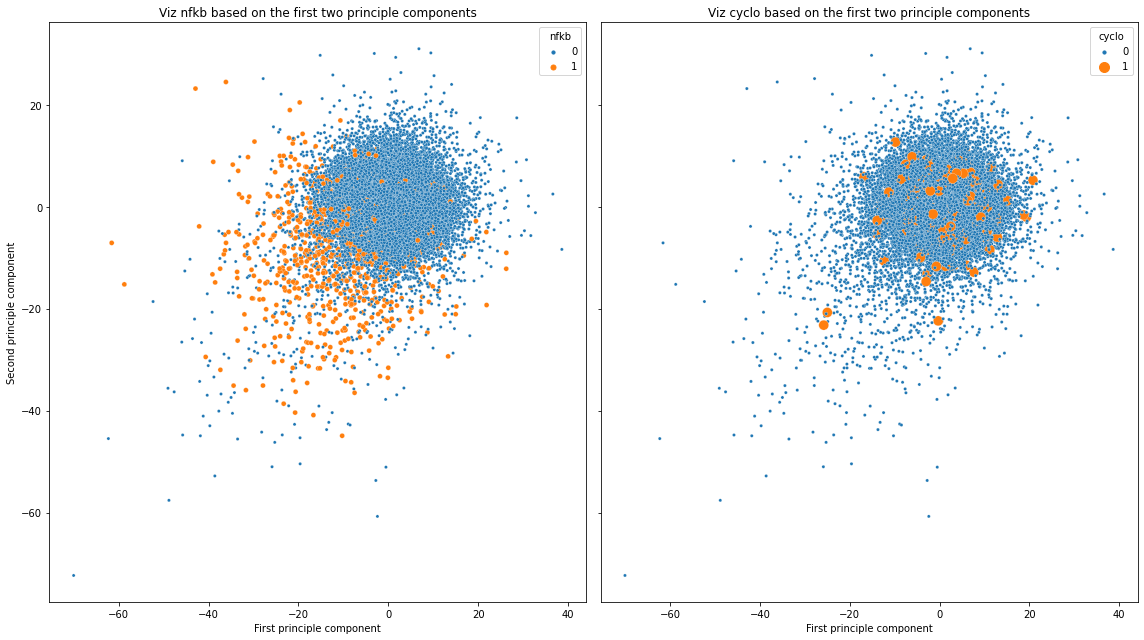

In [237]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_srp, x=df_srp[0], y=df_srp[1], 
                hue='nfkb', size='nfkb', sizes=(25, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')

sns.scatterplot(data=df_srp, x=df_srp[0], y=df_srp[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')

plt.tight_layout()
plt.show()

**Takeaways**
- Changing the random state simply rotate the plot. 

### MiniBatch Dictionary Learning
Finds a dictionary (a set of atoms) that can best be used to represent data using a sparse code.

In [238]:
# Create the object
mini = MiniBatchDictionaryLearning(n_components=10, alpha=1, random_state=123)

# Print the object
mini

MiniBatchDictionaryLearning(n_components=10, random_state=123)

In [239]:
# Fit and transform the scaled data
X_mini = mini.fit_transform(X_scaled)

# Print the shape
X_mini.shape

(23814, 10)

In [240]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_mini = pd.DataFrame(X_mini)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_mini['nfkb'] = nfkb.values
df_mini['cyclo'] = cyclo.values

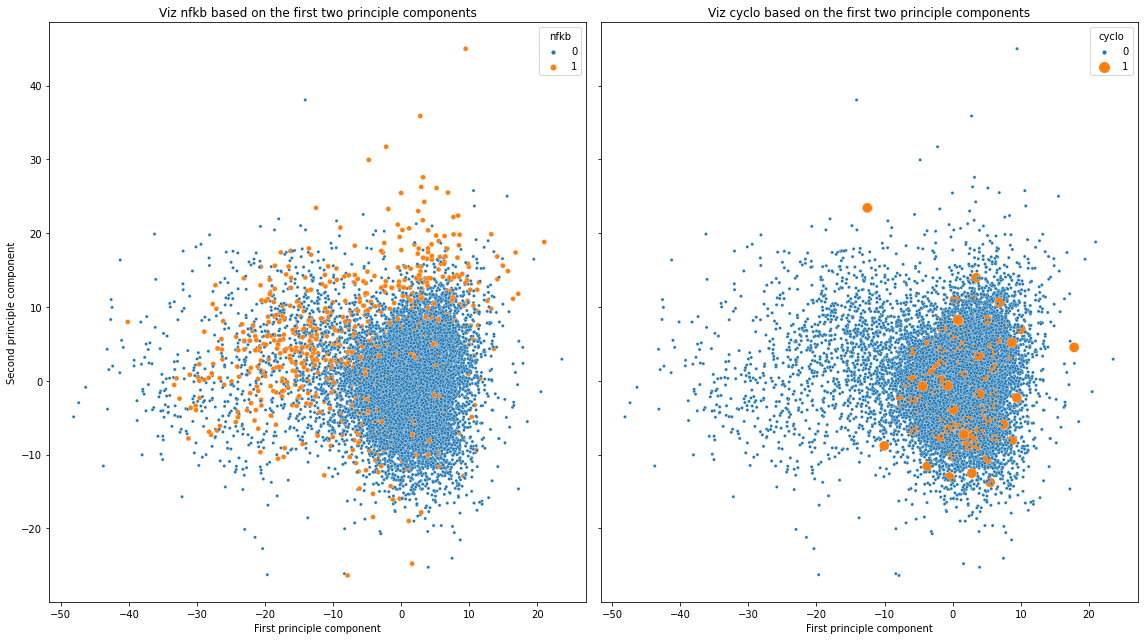

In [241]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_mini, x=df_mini[0], y=df_mini[1], 
                hue='nfkb', size='nfkb', sizes=(25, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')

sns.scatterplot(data=df_mini, x=df_mini[0], y=df_mini[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')

plt.tight_layout()
plt.show()

**Takeaways**
- Similar to random projection.

### Independent Composent Analysis (ICA): Parallel

In [247]:
# Create the object
ica = FastICA(n_components=10, algorithm='parallel', random_state=123)

# Print the object
ica

FastICA(n_components=10, random_state=123)

In [248]:
# Fit and transform the scaled data
X_ica = ica.fit_transform(X_scaled)

# Print the shape
X_ica.shape

(23814, 10)

In [249]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_ica = pd.DataFrame(X_ica)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_ica['nfkb'] = nfkb.values
df_ica['cyclo'] = cyclo.values

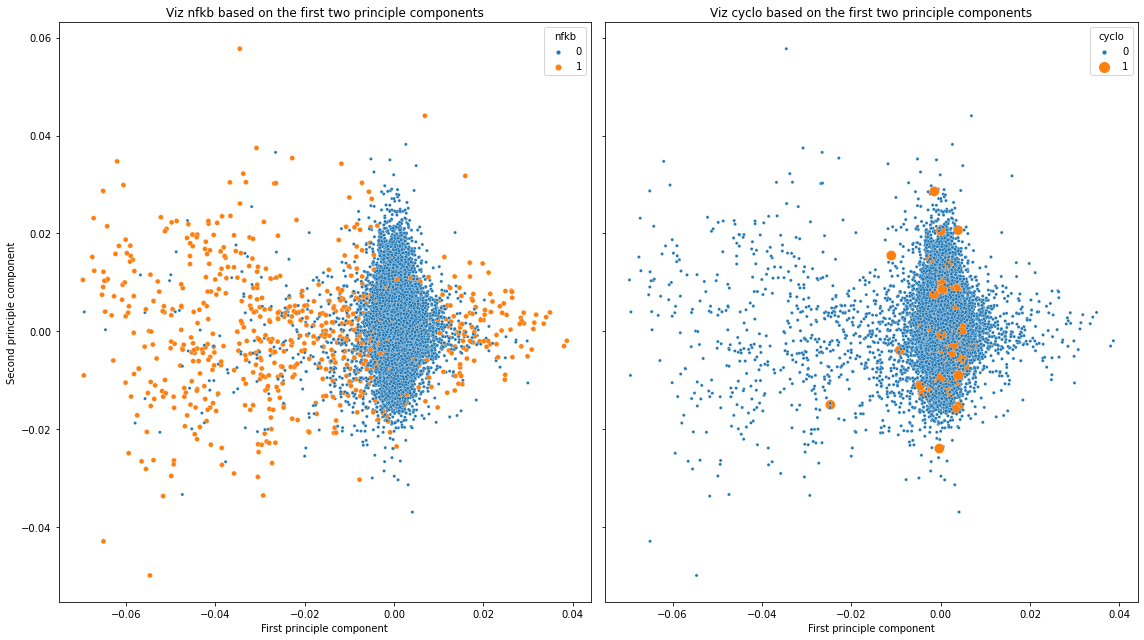

In [250]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_ica, x=df_ica[0], y=df_ica[1], 
                hue='nfkb', size='nfkb', sizes=(25, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')

sns.scatterplot(data=df_ica, x=df_ica[0], y=df_ica[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')

plt.tight_layout()
plt.show()

**Takeaways**
- FastICA scatter the satellites on both side the the dense core. 
- The shape of the dense core changes from ball-shaped to a football. 

### Independent Composent Analysis (ICA): Deflation

In [251]:
# Create the object
ica = FastICA(n_components=10, algorithm='deflation', random_state=123)

# Print the object
ica

FastICA(algorithm='deflation', n_components=10, random_state=123)

In [252]:
# Fit and transform the scaled data
X_ica = ica.fit_transform(X_scaled)

# Print the shape
X_ica.shape

(23814, 10)

In [253]:
# Prepare the data for visualization

# Convert X_pca to dataframe
df_ica = pd.DataFrame(X_ica)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_ica['nfkb'] = nfkb.values
df_ica['cyclo'] = cyclo.values

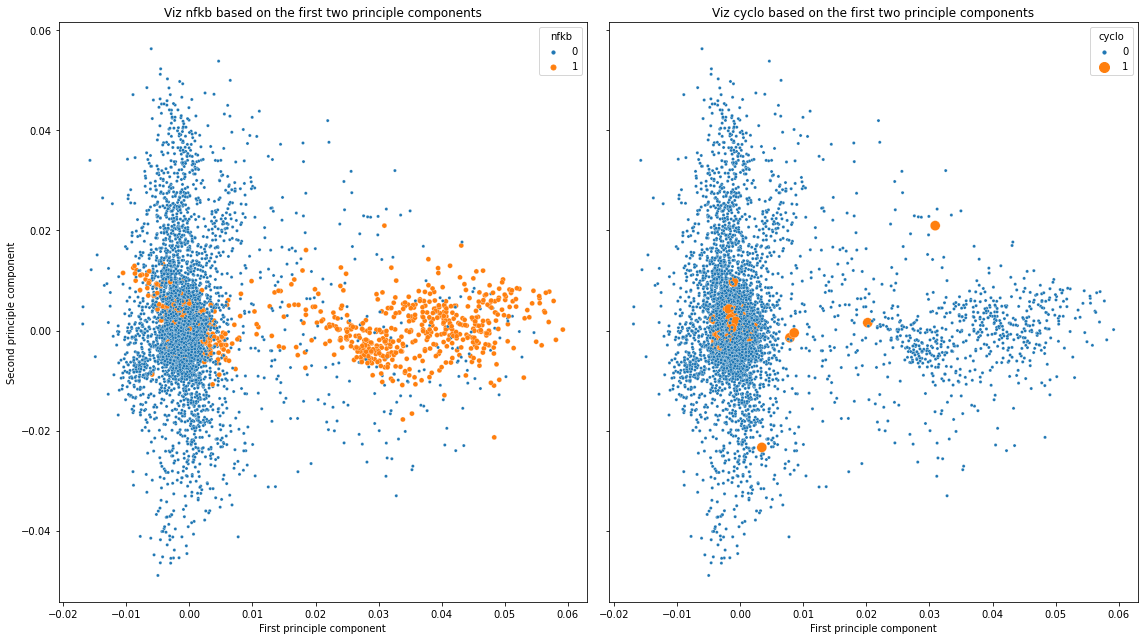

In [254]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_ica, x=df_ica[0], y=df_ica[1], 
                hue='nfkb', size='nfkb', sizes=(25, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')

sns.scatterplot(data=df_ica, x=df_ica[0], y=df_ica[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')

plt.tight_layout()
plt.show()

**Takeaways**
- The dense core is stretched along the direction of y-axis. 

### T-distributed Stochastic Neighbor Embedding (T-SNE)
- A tool to visualize high-dimensional data.
- It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.
- t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.
- It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.
- This will suppress some noise and speed up the computation of pairwise distances between samples. 

In [ ]:
# Create the subject
tsne = TSNE(n_components=2, random_state=123)

# Print the object
tsne

In [ ]:
# Fit and transform the scaled data
X_tsne = tsne.fit_transform(X_scaled) # Took 18 mins

# Print the shape
X_tsne.shape

In [ ]:
# Prepare the data for visualization

# Convert X_tsne to dataframe
df_tsne = pd.DataFrame(X_tsne)

# Take the labels from the matrix
nfkb = df_targets.loc[:, 'nfkb_inhibitor']
cyclo = df_targets.loc[:, 'cyclooxygenase_inhibitor']

# Add the target columns
df_tsne['nfkb'] = nfkb.values
df_tsne['cyclo'] = cyclo.values

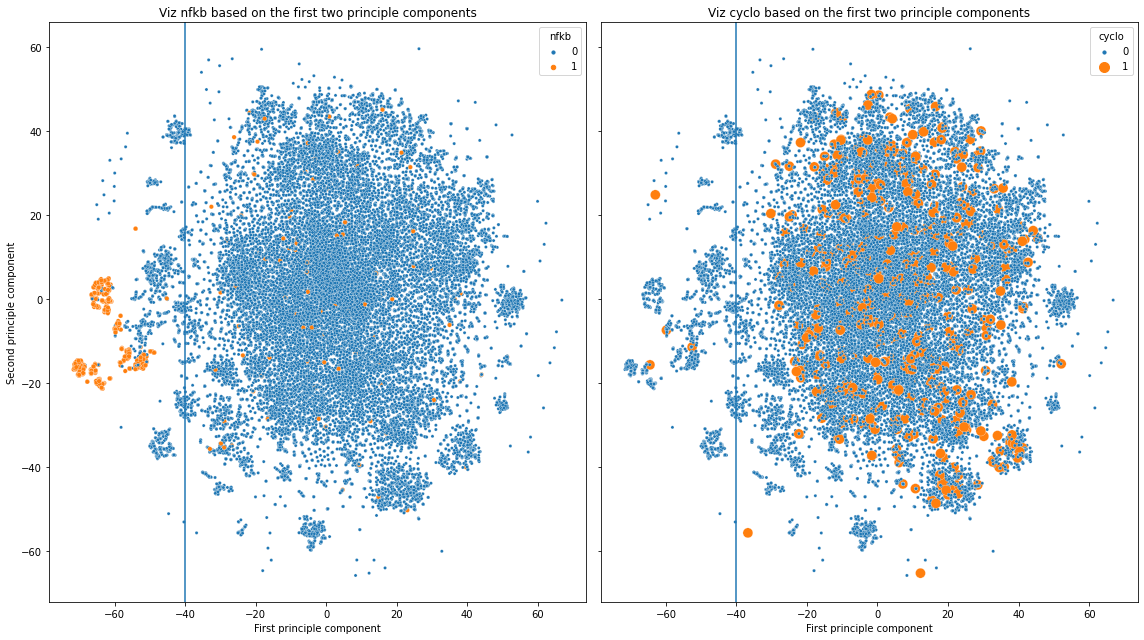

In [260]:
# Viz

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), sharey=True)

sns.scatterplot(data=df_tsne, x=df_tsne[0], y=df_tsne[1], 
                hue='nfkb', size='nfkb', sizes=(20, 10), ax=ax1)
ax1.set_title('Viz nfkb based on the first two principle components')
ax1.set_xlabel('First principle component')
ax1.set_ylabel('Second principle component')
ax1.axvline(x=-40)

sns.scatterplot(data=df_tsne, x=df_tsne[0], y=df_tsne[1], 
                hue='cyclo', size='cyclo', sizes=(100, 10), ax=ax2)
ax2.set_title('Viz cyclo based on the first two principle components')
ax2.set_xlabel('First principle component')
ax2.set_ylabel('Second principle component')
ax2.axvline(x=-40)

plt.tight_layout()
plt.show()

**Takeaways**:
1. So far, TSNE is the best algorithm to breaks the dense core apart.
2. However, the sacrifice is that now the satellites becomes clusters. 
3. And it is time-consuming. 
3. The perplexity by default is 30.
    - The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.